In [1]:
import popsims
import numpy as np
import pandas as pd
import splat
import popsims
from astropy.coordinates import SkyCoord, Galactic
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
#sns.set_style("darkgrid", {"axes.facecolor": ".95"})

plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')

from  matplotlib.colors import Normalize
import astropy.units as u
import popsims
import matplotlib
from tqdm import tqdm
from tqdm import tqdm
import matplotlib as mpl 
from popsims.abs_mags import get_abs_mag
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] =20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['figure.titlesize'] = 20

splat.initializeStandards(all=True)

%matplotlib inline

Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database


In [85]:
def group_by_spt(spts, values, grid= np.arange(15, 41)):
    res=np.ones_like(grid)*np.nan
    std=np.ones_like(grid)*np.nan
    for idx, g in enumerate(grid):
        if idx < len(grid)-1:
            bools=np.logical_and(spts>=grid[idx], spts<grid[idx+1])
        else:
            bools=spts>=grid[-1]
        np.place(res, grid==[grid[idx]], np.nanmedian(values[bools]) )
        np.place(std, grid==[grid[idx]], np.nanstd(values[bools]))
    return {'grid': grid, 'median': res, 'std': std}

In [2]:
vals=popsims.make_systems(bfraction=0.5)

In [ ]:
#mass functuin and mass ratio distributin

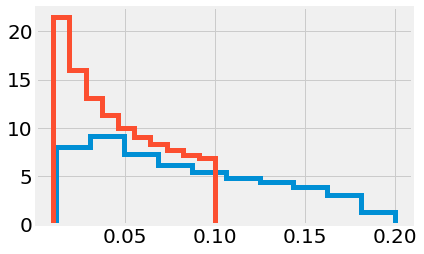

In [3]:
h=plt.hist(vals['mass'][vals.is_binary], density=True, histtype='step', lw=5,  )
h=plt.hist(vals['mass'][~vals.is_binary], density=True,  histtype='step', lw=5,  )

In [104]:
#

[Text(0.5, 0, 'Mass Ratio')]

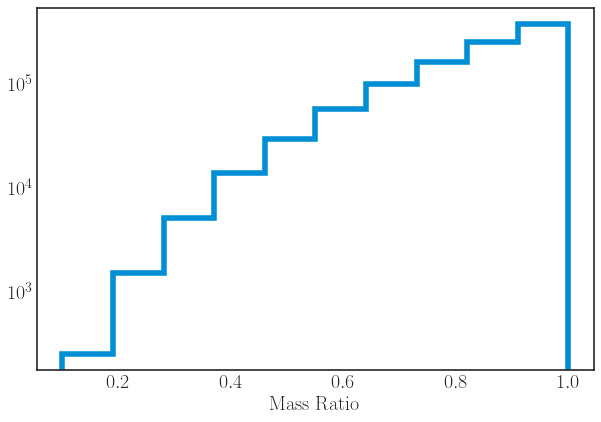

In [112]:
fig, ax=plt.subplots()
h=plt.hist(vals.sec_mass/vals.pri_mass,  histtype='step', lw=5,  log=True)
ax.set(xlabel='Mass Ratio')

In [114]:
vals.luminosity

0        -5.447614
1        -6.713448
2        -3.183659
3        -5.584516
4        -5.489392
            ...   
999995   -4.389912
999996   -2.863327
999997   -5.597264
999998   -4.945950
999999   -5.827401
Name: luminosity, Length: 2000000, dtype: float64

In [ ]:
fig, ax=plt.subplots()
h=plt.hist(vals.sec_mass/vals.pri_mass,  histtype='step', lw=5,  log=True)
ax.set(xlabel='Mass Ratio')

[Text(0.5, 0, 'SpT ')]

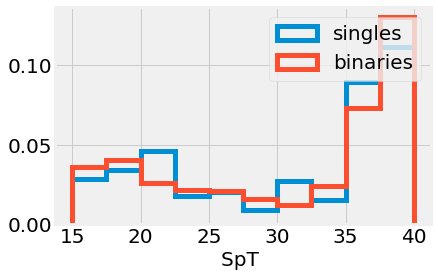

In [4]:
fig, ax=plt.subplots()
h=plt.hist(vals['spt'][vals.is_binary], density=True,  range=[15, 40], \
           histtype='step', lw=5,  label='singles')
h=plt.hist(vals['spt'][~vals.is_binary], density=True, range=[15, 40], histtype='step', lw=5,\
          label='binaries')
ax.legend()
ax.set(xlabel='SpT ')

[Text(0.5, 0, 'J mag ')]

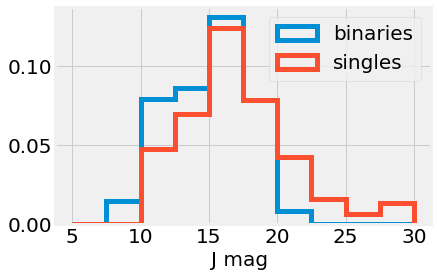

In [5]:
fig, ax=plt.subplots()
h=plt.hist(vals['abs_2MASS_J'][vals.is_binary], density=True,  range=[5, 30],\
           histtype='step', lw=5, label='binaries' )
h=plt.hist(vals['abs_2MASS_J'][~vals.is_binary], density=True, range=[5, 30], \
           histtype='step', lw=5, label='singles' )
ax.legend()
ax.set(xlabel='J mag ')

[Text(0.5, 0, 'mass'), Text(0, 0.5, 'log luminosity ')]

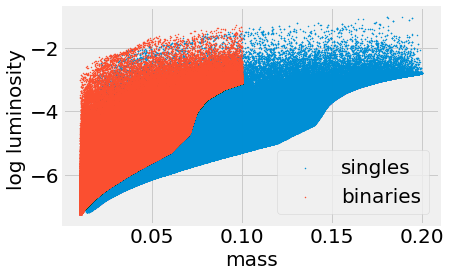

In [6]:
fig, ax=plt.subplots()
ax.scatter(vals.mass[vals.is_binary], vals.luminosity[vals.is_binary], s=1, 
           label='singles')
ax.scatter(vals.mass[~vals.is_binary], vals.luminosity[~vals.is_binary], s=1,
          label='binaries')
plt.legend()
ax.set(xlabel='mass', ylabel='log luminosity ')

[Text(0, 0.5, 'Teff'), Text(0.5, 0, 'SpT')]

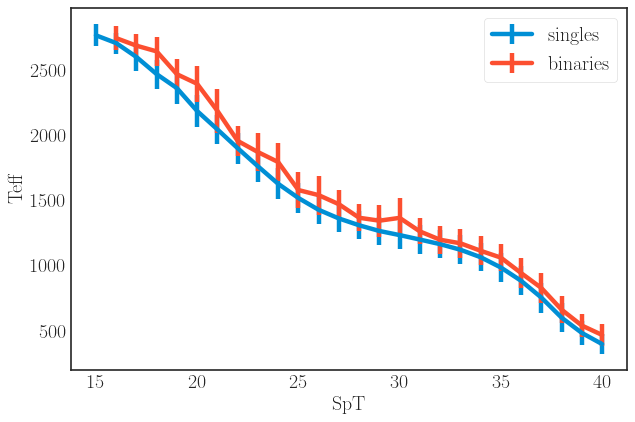

In [99]:
fig, ax=plt.subplots()
sings=group_by_spt(vals.spt[~vals.is_binary],vals.temperature[~vals.is_binary])
bins=group_by_spt(vals.spt[vals.is_binary], vals.temperature[vals.is_binary])

ax.errorbar(sings['grid'], sings['median'], yerr=sings['std'], label='singles')
ax.errorbar(bins['grid'], bins['median'], yerr=bins['std'], label='binaries')
ax.legend()
ax.set(ylabel='Teff', xlabel='SpT')

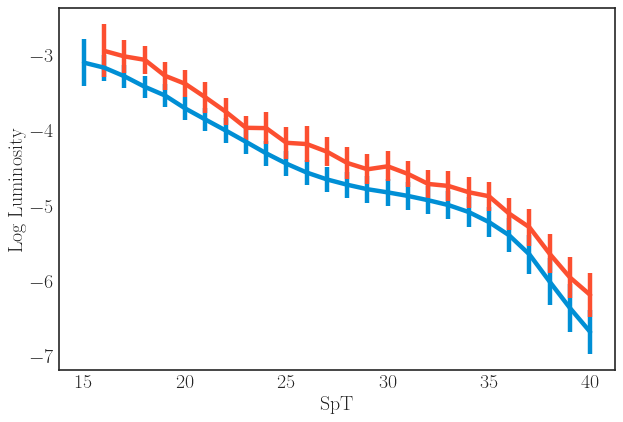

In [100]:
fig, ax=plt.subplots()
sings=group_by_spt(vals.spt[~vals.is_binary],vals.luminosity[~vals.is_binary])
bins=group_by_spt(vals.spt[vals.is_binary], vals.luminosity[vals.is_binary])

ax.errorbar(sings['grid'], sings['median'], yerr=sings['std'], label='singles')
ax.errorbar(bins['grid'], bins['median'], yerr=bins['std'], label='binaries')

ax.set(ylabel='Log Luminosity', xlabel='SpT')
ax.minorticks_on()

In [13]:
import wisps

In [14]:
def get_distances(spts):
    return pd.Series({'distanc': np.random.uniform(0, 10, len(spts)),
                     'lol': np.random.uniform(0, 10, len(spts))})

In [12]:
h=350
model='baraffe2003'

In [15]:
data_bins=pd.read_hdf(wisps.OUTPUT_FILES+'/final_simulated_sample_cut_binaries.h5',\
                      key=str(model)+str('h'))
data=pd.read_hdf(wisps.OUTPUT_FILES+'/final_simulated_sample_cut.h5',\
                       key=str(model)+str('h')+str(h)+'F110_corrected')

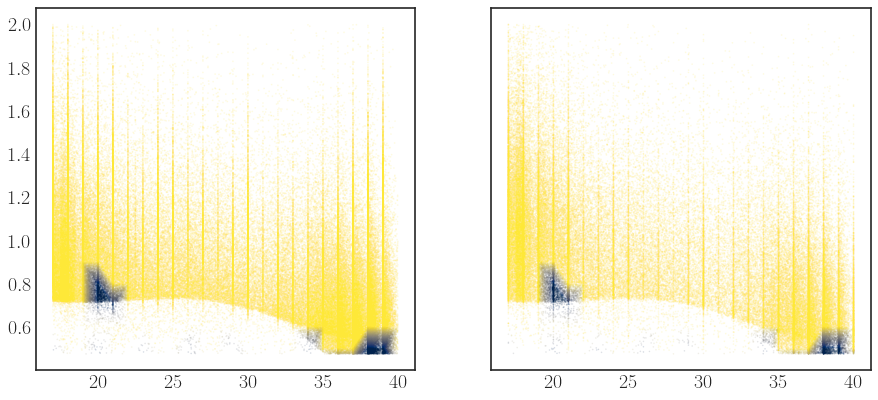

In [16]:
fig, (ax, ax1)=plt.subplots(figsize=(12, 6), ncols=2, sharey=True)


ax.scatter(data_bins['spt'][~data_bins.is_cut.values], 
           np.log10(data_bins['snrj'])[~data_bins.is_cut.values],
           c=data_bins['slprob'][~data_bins.is_cut.values], 
           alpha=0.1, s=1, cmap='cividis')

ax1.scatter(data['spt'], np.log10(data['snr']), c=data['sl'], 
           alpha=0.1, s=1, cmap='cividis')

[Text(0.5, 0, 'Spectral Type')]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


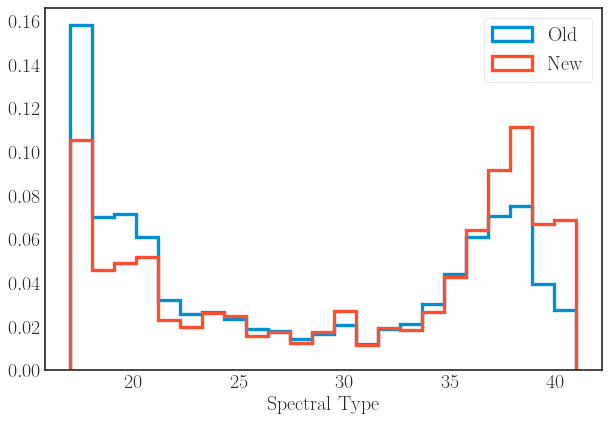

In [17]:
fig, ax=plt.subplots()
h=plt.hist(data['spt'].values, bins=23, histtype='step', lw=3, density=True, label='Old')
h=plt.hist(data_bins['spt'][~data_bins.is_cut.values].values, bins=23,\
           histtype='step', lw=3, label='New', density=True)
plt.legend()
ax.set(xlabel='Spectral Type')

In [27]:
data_bins.columns

Index(['mass', 'age', 'temperature', 'luminosity', 'abs_2MASS_J',
       'abs_2MASS_H', 'is_binary', 'spt', 'prim_spt', 'sec_spt', 'pri_mass',
       'sec_mass', 'dist', 'pntname', 'pnt', 'exp_image', 'exp_grism',
       'absF110', 'appF110', 'appF110er', 'absF140', 'appF140', 'appF140er',
       'absF160', 'appF160', 'appF160er', 'snrj110', 'snrj140', 'snrjs160',
       'snrj', 'slprob', 'is_cut'],
      dtype='object')

In [88]:
cut_flag=data_bins.is_cut.values
bin_flag=data_bins.is_binary.values

[Text(0.5, 0, 'Spectral Type'), Text(0, 0.5, 'Abs J mag')]

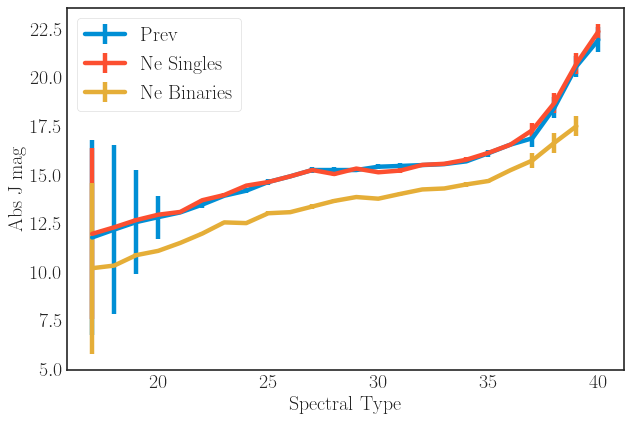

In [95]:
fig, ax=plt.subplots()
prev=group_by_spt(data['spt'].values, popsims.abs_mags.get_abs_mag(data['spt'].values, '2MASS J')[0])
ne_sing=group_by_spt(data_bins['spt'][np.logical_and(~cut_flag, ~bin_flag)], \
                 data_bins['abs_2MASS_J'][np.logical_and(~cut_flag, ~bin_flag)])

ne_bins=group_by_spt(data_bins['spt'][np.logical_and(~cut_flag, bin_flag)], \
                 data_bins['abs_2MASS_J'][np.logical_and(~cut_flag, bin_flag)])

ax.errorbar(prev['grid'], prev['median'], yerr= prev['std'], ms=1, label='Prev')
h=ax.errorbar(ne_sing['grid'], ne_sing['median'],  \
              yerr= ne_sing['std'], ms=1, label='Ne Singles')
h=ax.errorbar(ne_bins['grid'], ne_bins['median'],  \
              yerr= ne_sing['std'], ms=1, label='Ne Binaries')
ax.legend()

ax.legend()
ax.set(xlabel='Spectral Type', ylabel='Abs J mag')

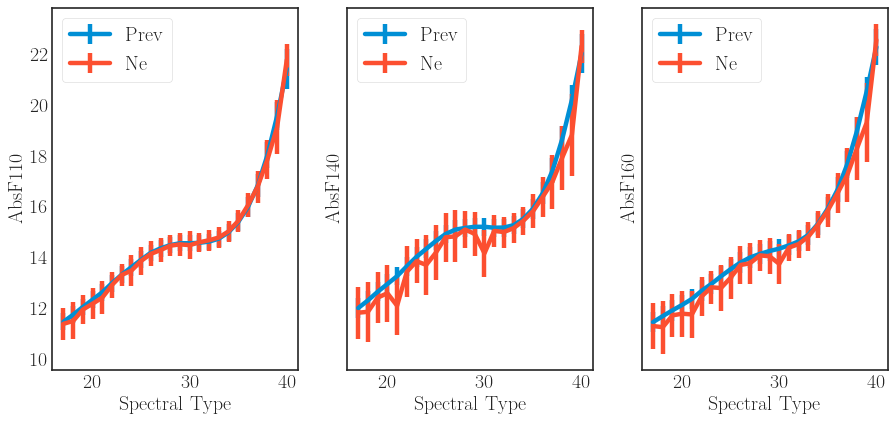

In [84]:
fig, ax=plt.subplots(figsize=(12, 6), ncols= 3, sharey=True)

for a, mag_key in zip(ax, ['F110', 'F140', 'F160']):
    prev=group_by_spt(data['spt'].values, data[mag_key.lower()].values)
    ne=group_by_spt(data_bins['spt'][~data_bins.is_cut.values].values, \
                 data_bins['abs{}'.format(mag_key)][~data_bins.is_cut.values].values)
    h=a.errorbar(prev['grid'], prev['median'], yerr= prev['std'], ms=1, label='Prev')
    h=a.errorbar(ne['grid'], ne['median'],  yerr= ne['std'], ms=1, label='Ne')
    a.legend()
    a.set(xlabel='Spectral Type', ylabel='Abs{}'.format(mag_key))

259320

In [24]:
data_bins.columns

Index(['mass', 'age', 'temperature', 'luminosity', 'abs_2MASS_J',
       'abs_2MASS_H', 'is_binary', 'spt', 'prim_spt', 'sec_spt', 'pri_mass',
       'sec_mass', 'dist', 'pntname', 'pnt', 'exp_image', 'exp_grism',
       'absF110', 'appF110', 'appF110er', 'absF140', 'appF140', 'appF140er',
       'absF160', 'appF160', 'appF160er', 'snrj110', 'snrj140', 'snrjs160',
       'snrj', 'slprob', 'is_cut'],
      dtype='object')

In [ ]:
data_bins.rename(columns={'temperature': 'teff', })